In [20]:
import pandas as pd
import numpy as np

In [21]:
df = pd.read_excel('daily-temp.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        699 non-null    object 
 1   daily-temp  686 non-null    float64
 2   worker      699 non-null    object 
dtypes: float64(1), object(2)
memory usage: 16.5+ KB


1. Turn object type to date, then mask the dates from 15th of June 1989.

In [22]:
df['date'] = pd.to_datetime(df['date'])
mask = (df['date'] > '15/6/1989')
df = df.loc[mask]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 135 to 698
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        564 non-null    datetime64[ns]
 1   daily-temp  554 non-null    float64       
 2   worker      564 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 17.6+ KB


2. Replace of NaN daily-temp values by taking the average of that days one month before and later dates daily-temp values.

In [23]:
def takeAverage(x):
    if np.isnan(x['daily-temp']):
        before = df.loc[df['date'] ==(x['date'] + pd.DateOffset(days=-1)), 'daily-temp']
        later = df.loc[df['date'] ==(x['date'] + pd.DateOffset(days=1)), 'daily-temp']
        return (float(later) + float(before)) / 2
    else: 
        return x['daily-temp']

In [24]:

df['daily-temp'] = df.apply(lambda x : takeAverage(x),axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 135 to 698
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        564 non-null    datetime64[ns]
 1   daily-temp  564 non-null    float64       
 2   worker      564 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 17.6+ KB


3. Separate the dates data frame as a new data frame by splitting the day, month, year, and is weekday of the date.

In [25]:
dates = pd.DataFrame()
dates['day'] = df['date'].dt.day
dates['month'] = df['date'].dt.month
dates['year'] = df['date'].dt.year
dates['is-weekday'] = df['date'].dt.weekday % 7 < 5
dates

,day,month,year,is-weekday
135,16,6,1989,True
136,17,6,1989,False
137,18,6,1989,False
138,19,6,1989,True
139,20,6,1989,True
...,...,...,...,...
694,27,12,1990,True
695,28,12,1990,True
696,29,12,1990,False
697,30,12,1990,False


4. Write dates that are obtained from the data frame wirtten into the xlsx file.

In [26]:
dates.to_excel('dates.xlsx')

In [27]:
df.reset_index(drop=True, inplace=True)
dates.reset_index(drop=True, inplace=True)
df = pd.concat([df, dates], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        564 non-null    datetime64[ns]
 1   daily-temp  564 non-null    float64       
 2   worker      564 non-null    object        
 3   day         564 non-null    int64         
 4   month       564 non-null    int64         
 5   year        564 non-null    int64         
 6   is-weekday  564 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 27.1+ KB


In [28]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='date'>

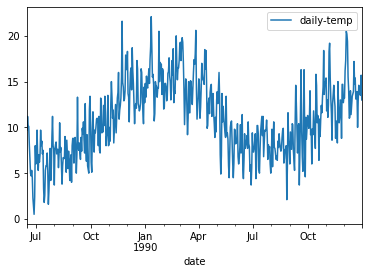

In [29]:
ax = plt.gca()
df.plot(kind='line', x='date', y='daily-temp', ax=ax)

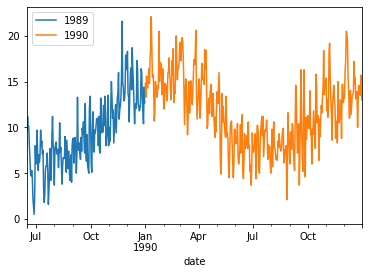

In [30]:
fig, ax = plt.subplots()
for key, group in df.groupby('year'):
    ax = group.plot(kind='line', ax=ax, x='date', y='daily-temp', label=key)
plt.legend(loc='best')
plt.show()

7. Print the total workdays of the workers.

In [31]:
groups = df.groupby('worker')['date']
workdays = groups.last() - groups.first()
workdays.to_excel('workdays.xlsx')
workdays

worker
ahmet    114 days
hamza    204 days
kemal     74 days
mahmut    29 days
mehmet    57 days
umut      21 days
yunus     58 days
Name: date, dtype: timedelta64[ns]

8. Export the workers group by name.

In [32]:
for key, group in df.groupby('worker'):
    group.reset_index(drop=True, inplace=True)
    group.to_excel('workers/' + str(key) + '.xlsx')
    group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        115 non-null    datetime64[ns]
 1   daily-temp  115 non-null    float64       
 2   worker      115 non-null    object        
 3   day         115 non-null    int64         
 4   month       115 non-null    int64         
 5   year        115 non-null    int64         
 6   is-weekday  115 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 5.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        205 non-null    datetime64[ns]
 1   daily-temp  205 non-null    float64       
 2   worker      205 non-null    object        
 3   day         205 non-null 

In [33]:

groups = df.groupby('worker')['daily-temp']
averages = groups.mean().to_frame(name= 'avg').reset_index()
averages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   worker  7 non-null      object 
 1   avg     7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


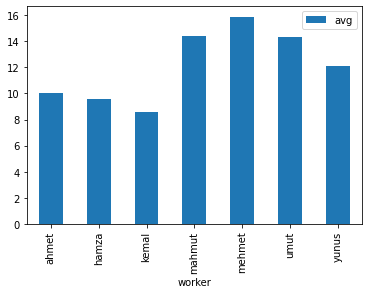

In [34]:
averages.plot(kind='bar', x='worker', y='avg')
plt.show()

In [35]:
groups = df.groupby(['year', 'month'])['daily-temp']
monthly_averages = groups.mean().to_frame(name= 'avg').reset_index()
monthly_averages

,year,month,avg
0,1989,6,6.000000
1,1989,7,6.332258
2,1989,8,6.770968
3,1989,9,8.366667
4,1989,10,9.867742
5,1989,11,12.876667
6,1989,12,13.951613
7,1990,1,15.577419
8,1990,2,15.417857
9,1990,3,14.841935


<AxesSubplot:xlabel='is-weekday'>

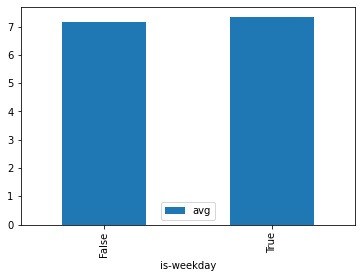

In [36]:
groups = df.loc[df['month'] == 7].reset_index().groupby('is-weekday')['daily-temp']
june_averages = groups.mean().to_frame(name= 'avg').reset_index()
june_averages.plot(kind='bar', x='is-weekday', y='avg')